<a href="https://colab.research.google.com/github/Evans-Sense/pet/blob/main/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrdaniilak/russia-real-estate-20182021")

print("Path to dataset files:", path)

100%|██████████| 111M/111M [00:03<00:00, 35.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mrdaniilak/russia-real-estate-20182021/versions/3


In [5]:
import os
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/root/.cache/kagglehub/datasets/mrdaniilak/russia-real-estate-20182021/versions/3/all_v2.csv


In [53]:
db = pd.read_csv('/root/.cache/kagglehub/datasets/mrdaniilak/russia-real-estate-20182021/versions/3/all_v2.csv')

db.head()

price        date      time  geo_lat  geo_lon  region  building_type  \
0  6050000  2018-02-19  20:00:21   59.806   30.376    2661              1   
1  8650000  2018-02-27  12:04:54   55.684   37.297      81              3   
2  4000000  2018-02-28  15:44:00   56.295   44.062    2871              1   
3  1850000  2018-03-01  11:24:52   44.996   39.075    2843              4   
4  5450000  2018-03-01  17:42:43   55.919   37.985      81              3   

   level  levels  rooms   area  kitchen_area  object_type  
0      8      10      3 82.600        10.800            1  
1      5      24      2 69.100        12.000            1  
2      5       9      3 66.000        10.000            1  
3     12      16      2 38.000         5.000           11  
4     13      14      2 60.000        10.000            1

In [54]:
db.shape

(5477006, 13)

In [55]:
db.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   price          5477006 non-null  int64  
 1   date           5477006 non-null  object 
 2   time           5477006 non-null  object 
 3   geo_lat        5477006 non-null  float64
 4   geo_lon        5477006 non-null  float64
 5   region         5477006 non-null  int64  
 6   building_type  5477006 non-null  int64  
 7   level          5477006 non-null  int64  
 8   levels         5477006 non-null  int64  
 9   rooms          5477006 non-null  int64  
 10  area           5477006 non-null  float64
 11  kitchen_area   5477006 non-null  float64
 12  object_type    5477006 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


In [56]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
db.describe()

price     geo_lat     geo_lon      region  building_type  \
count     5477006.000 5477006.000 5477006.000 5477006.000    5477006.000   
mean      4422029.023      54.038      53.244    4307.141          1.949   
std      21507519.155       4.623      20.748    3308.050          1.039   
min   -2144967296.000      41.459      19.890       3.000          0.000   
25%       1950000.000      53.378      37.778    2661.000          1.000   
50%       2990000.000      55.171      43.068    2922.000          2.000   
75%       4802000.000      56.226      65.649    6171.000          3.000   
max    2147483647.000      71.980     162.536   61888.000          5.000   

            level      levels       rooms        area  kitchen_area  \
count 5477006.000 5477006.000 5477006.000 5477006.000   5477006.000   
mean        6.215      11.399       1.726      53.918        10.628   
std         4.957       6.536       1.082      33.353         9.792   
min         1.000       1.000      -2.000       0.070         0.010   
25%         2.000       5.000       1.000      38.000         7.000   
50%         5.000      10.000       2.000      48.020         9.700   
75%         9.000      16.000       2.000      63.130        12.700   
max        39.000      39.000      10.000    7856.000      9999.000   

       object_type  
count  5477006.000  
mean         3.945  
std          4.558  
min          1.000  
25%          1.000  
50%          1.000  
75%         11.000  
max         11.000

In [57]:
db.isna().sum()

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

In [58]:
db.duplicated().sum()

np.int64(1523)

In [59]:
db = db.drop_duplicates()
db.shape

(5475483, 13)

In [60]:
db.drop('time', axis=1, inplace=True)

In [61]:
db.object_type = db.object_type.apply(lambda x: 2 if x == 11 else x)

In [62]:
db.rooms = db.rooms.apply(lambda x : 0 if x < 0 else x)

In [63]:
db.price = db.price.abs()

In [64]:
db.loc[db.level > db.levels, 'level'] = db.levels
db['level_to_levels'] = db.level / db.levels

db.drop('level', axis=1, inplace=True)
db.drop("levels", axis=1, inplace=True)

In [65]:
db.date = pd.to_datetime(db.date)

In [66]:
db.head()

price       date  geo_lat  geo_lon  region  building_type  rooms   area  \
0  6050000 2018-02-19   59.806   30.376    2661              1      3 82.600   
1  8650000 2018-02-27   55.684   37.297      81              3      2 69.100   
2  4000000 2018-02-28   56.295   44.062    2871              1      3 66.000   
3  1850000 2018-03-01   44.996   39.075    2843              4      2 38.000   
4  5450000 2018-03-01   55.919   37.985      81              3      2 60.000   

   kitchen_area  object_type  level_to_levels  
0        10.800            1            0.800  
1        12.000            1            0.208  
2        10.000            1            0.556  
3         5.000            2            0.750  
4        10.000            1            0.929

In [69]:
region_name = {
    '2661': 'Санкт-Петербург',
    '3446': 'Ленинградская область',
    '3': 'Москва',
    '81': 'Московская область',
    '2843': 'Краснодарский край',
    '2871': 'Нижегородская область',
    '3230': 'Ростовская область',
    '3106': 'Самарская область',
    '2922': 'Республика Татарстан',
    '2900': 'Ставропольский край',
    '2722': 'Республика Башкортостан',
    '6171': 'Свердловская область',
    '4417': 'Республика Коми',
    '5282': 'Челябинская область',
    '5368': 'Иркутская область',
    '5520': 'Пермский край',
    '6817': 'Алтайский край',
    '9579': 'Республика Бурятия',
    '2604': 'Ярославская область',
    '1010': 'Удмуртская Республика',
    '7793': 'Псковская область',
    '13919': 'Республика Северная Осетия — Алания',
    '2860': 'Кемеровская область',
    '3019': 'Чувашская Республика',
    '4982': 'Республика Марий Эл',
    '9648': 'Кабардино-Балкарская Республика',
    '5241': 'Республика Мордовия',
    '3870': 'Красноярский край',
    '3991': 'Тюменская область',
    '2359': 'Республика Хакасия',
    '9654': 'Новосибирская область',
    '2072': 'Воронежская область',
    '8090': 'Республика Карелия',
    '4007': 'Республика Дагестан',
    '11171': 'Республика Саха (Якутия)',
    '10160': 'Забайкальский край',
    '7873, 6937': 'Республика Крым',
    '2594': 'Кировская область',
    '8509': 'Республика Калмыкия',
    '11416': 'Республика Адыгея',
    '11991': 'Карачаево-Черкесская Республика',
    '5178': 'Республика Тыва',
    '13913': 'Республика Ингушетия',
    '6309': 'Республика Алтай',
    '5952': 'Белгородская область',
    '6543': 'Архангельская область',
    '2880': 'Тверская область',
    '5993': 'Пензенская область',
    '2484': 'Ханты-Мансийский автономный округ',
    '4240': 'Липецкая область',
    '5789': 'Владимирская область',
    '14880': 'Ямало-Ненецкий автономный округ',
    '1491': 'Рязанская область',
    '2885': 'Чеченская Республика',
    '5794': 'Смоленская область',
    '2528': 'Саратовская область',
    '4374': 'Вологодская область',
    '4695': 'Волгоградская область',
    '2328': 'Калужская область',
    '5143': 'Тульская область',
    '2806': 'Тамбовская область',
    '14368': 'Мурманская область',
    '5736': 'Новгородская область',
    '7121': 'Курская область',
    '4086': 'Хабаровский край',
    '821': 'Брянская область',
    '10582': 'Астраханская область',
    '7896': 'Калининградская область',
    '8640': 'Омская область',
    '5703': 'Курганская область',
    '10201': 'Томская область',
    '4249': 'Ульяновская область',
    '3153': 'Оренбургская область',
    '4189': 'Костромская область',
    '2814': 'Орловская область',
    '13098': 'Камчатский край',
    '8894': 'Ивановская область',
    '7929': 'Амурская область',
    '16705': 'Магаданская область',
    '69': 'Еврейская автономная область',
    '4963': 'Приморский край',
    '1901': 'Сахалинская область',
    '61888': 'Ненецкий автономный округ'
}

In [74]:
db.region = db.region.astype(str)

db['region_name'] = db['region'].map(region_name)

db.drop('region', axis=1, inplace=True)

db.head()

price       date  geo_lat  geo_lon  building_type  rooms   area  \
0  6050000 2018-02-19   59.806   30.376              1      3 82.600   
1  8650000 2018-02-27   55.684   37.297              3      2 69.100   
2  4000000 2018-02-28   56.295   44.062              1      3 66.000   
3  1850000 2018-03-01   44.996   39.075              4      2 38.000   
4  5450000 2018-03-01   55.919   37.985              3      2 60.000   

   kitchen_area  object_type  level_to_levels            region_name  
0        10.800            1            0.800        Санкт-Петербург  
1        12.000            1            0.208     Московская область  
2        10.000            1            0.556  Нижегородская область  
3         5.000            2            0.750     Краснодарский край  
4        10.000            1            0.929     Московская область

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

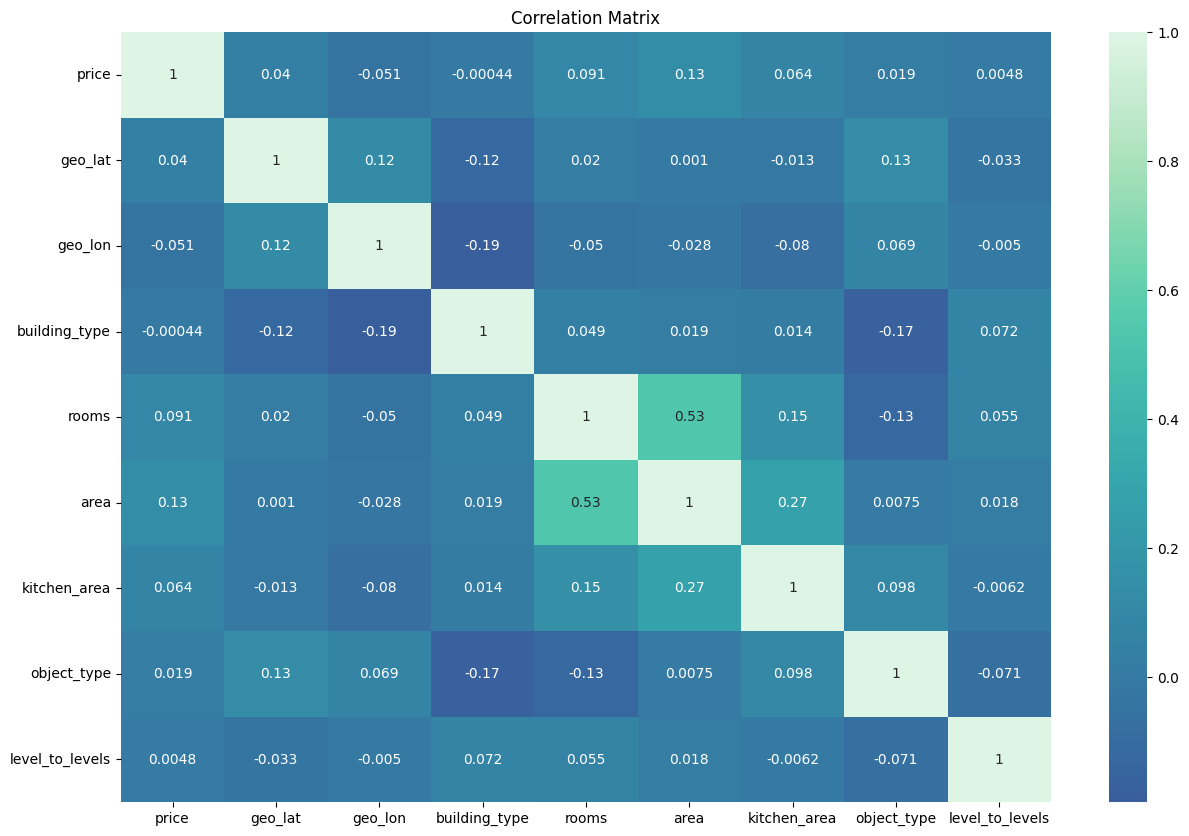

In [77]:
plt.figure(figsize=(15, 10))
sns.heatmap(db.corr(numeric_only=True), center=0, cmap='mako', annot=True)
plt.title('Correlation Matrix')
plt.show()